# Mini Project - Job Salaries Dataset
## Prediction Models
Models Used in this File:
- Decision Tree Regressor
- Linear Regression
- Support Vector Machine

In [27]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import collections
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime, timedelta
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter


from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, cross_validate

In [28]:
dsdata = pd.read_csv('new_ds_salaries.csv')
ds_new = dsdata.copy()

# Exploring the numeric data in hr_data
ds_num = ds_new.select_dtypes(['int64', 'float64']).copy()
ds_num.head()


,work_year,salary,salary_in_usd,remote_ratio,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
0,2020,70000,79833,0,1,1,2,1,0,0
1,2020,260000,260000,0,1,2,0,1,1,1
2,2020,85000,109024,1,1,2,1,1,0,0
3,2020,20000,20000,0,0,1,0,1,2,2
4,2020,150000,150000,1,1,2,2,1,2,2


## 1. Decision Tree Regressor

### 1.1. Define Model Inputs (X) & Output (y)

In [29]:
X = ds_num.drop(['salary_in_usd', 'work_year', 'salary'], axis=1)
y = ds_num['salary_in_usd']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 1.2. Create Decision Tree Regressor Model

In [31]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=40, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40, random_state=2)

### 1.3. Evaluating Decision Tree Regressor Model

In [32]:
# Training MSE
train_mse = sqrt(mean_squared_error(tree_reg.predict(X_train), y_train))
print('Training Root Mean Squared Error is: ', train_mse)

# Testing mse
test_mse = sqrt(mean_squared_error(tree_reg.predict(X_test), y_test))
print('Testing Root Mean Squared Error is: ',test_mse)

Training Root Mean Squared Error is:  43274.89780422692
Testing Root Mean Squared Error is:  50805.92102065478


In [33]:
train_R2 = tree_reg.score(X_train, y_train)
print('Training R^2 value is: ', train_R2)
test_R2 = tree_reg.score(X_test, y_test)
print('Testing R^2 value is: ', test_R2)

Training R^2 value is:  0.6527145903666689
Testing R^2 value is:  0.3822188904871636


### 1.4. Check using K-Fold Cross Validation to see if it will improve accuracy

In [34]:
results = cross_validate(tree_reg, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Training Score: ', results['train_score'])
print('Testing Score: ', results['test_score'])

Training Score:  [-1.36321987e+09 -1.84138812e+09 -1.81362243e+09 -1.86982251e+09
 -1.69590998e+09]
Testing Score:  [-8.79004687e+09 -2.98851088e+09 -2.55417600e+09 -2.52575967e+09
 -2.49799918e+09]


In [35]:
print('Cross Validation Training Root MSE is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing Root MSE is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))

Cross Validation Training Root MSE is: 41434.19579116102
Cross Validation Testing Root MSE is: 62219.75988419238


### 1.5. Improving Decision Tree Regressor Model

#### Using Gridsearch to improve on the model
- Finding the best Hyperparameters to select on modelling

In [36]:
param_grid = { "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                 "min_samples_leaf" : [15,20,25,35],
                 "min_samples_split" : [16,22,26,29],
                 'max_depth' : [40,45,50,55]}
gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

-2517258438.3874726
{'criterion': 'squared_error', 'max_depth': 40, 'min_samples_leaf': 15, 'min_samples_split': 16}


### 1.6. Create New Decision Tree Regressor Model with new Hyperparameters

In [37]:
tree_reg_new = tree.DecisionTreeRegressor(criterion='poisson', max_depth = 40, min_samples_leaf = 15, min_samples_split=16)
tree_reg_new.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=40, min_samples_leaf=15,
                      min_samples_split=16)

### 1.7. Evaluating model based on newly improved model with hyperparameters

In [38]:
#training mse
new_train_mse = sqrt(mean_squared_error(tree_reg_new.predict(X_train), y_train))
print('Training Root Mean Squared Error is: ', train_mse)
#testing mse
new_test_mse = sqrt(mean_squared_error(tree_reg_new.predict(X_test), y_test))
print('Testing Root Mean Squared Error is: ', test_mse)

Training Root Mean Squared Error is:  43274.89780422692
Testing Root Mean Squared Error is:  50805.92102065478


In [39]:
train_R2_new = tree_reg_new.score(X_train, y_train)
print('Training R^2 value is: ', train_R2_new)
test_R2_new = tree_reg_new.score(X_test, y_test)
print('Testing R^2 value is: ', test_R2_new)

Training R^2 value is:  0.4880372067291717
Testing R^2 value is:  0.5963031157460726


### 1.8. Check whether using K-fold Cross Validation will further improve the accuracy on the new Decision Tree Regressor Model

In [40]:
# Evaluate the Model using K-folds Cross validation
new_results = cross_validate(tree_reg_new, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', new_results['train_score'])
print('test_score: ', new_results['test_score'])

train_score:  [-1.97862647e+09 -2.40218837e+09 -2.42550820e+09 -2.63209033e+09
 -2.32002371e+09]
test_score:  [-3.71073112e+09 -2.22288206e+09 -2.50392802e+09 -1.63775566e+09
 -2.42847862e+09]


In [41]:
print('cross validation training root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('cross validation testing  root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))

cross validation training root mean_squared_error is: 48494.19981191559
cross validation testing  root mean_squared_error is: 50007.55038089571


### 1.9. Overview of Model

In [42]:
print("**Current Decision Tree Regressor Model**")
print()
print("RMSE Scores")
print("---Before---")
print('Training Root Mean Squared Error is: ', train_mse)
print('Testing Root Mean Squared Error is: ', test_mse)
print('Cross Validation Training Root mean_squared_error is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing Root mean_squared_error is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))
print()
print("---After---")
print('Training Root Mean Squared Error is: ', new_train_mse)
print('Testing Root Mean Squared Error is: ', new_test_mse)
print('Cross Validation Training Root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('Cross Validation Testing Root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))
print()
print("Accuracy")
print("---Before---")

print('training R^2 value is: ', train_R2)
print('testing R^2 value is: ', test_R2)
print()
print("---After---")
print('training R^2 value is: ', train_R2_new)
print('testing R^2 value is: ', test_R2_new)

**Current Decision Tree Regressor Model**

RMSE Scores
---Before---
Training Root Mean Squared Error is:  43274.89780422692
Testing Root Mean Squared Error is:  50805.92102065478
Cross Validation Training Root mean_squared_error is: 41434.19579116102
Cross Validation Testing Root mean_squared_error is: 62219.75988419238

---After---
Training Root Mean Squared Error is:  52542.65111712872
Testing Root Mean Squared Error is:  41070.001182039974
Cross Validation Training Root mean_squared_error is: 48494.19981191559
Cross Validation Testing Root mean_squared_error is: 50007.55038089571

Accuracy
---Before---
training R^2 value is:  0.6527145903666689
testing R^2 value is:  0.3822188904871636

---After---
training R^2 value is:  0.4880372067291717
testing R^2 value is:  0.5963031157460726


After applying the best hyperparameters and refitting the Decision Tree Regressor Model again

We can see that the training model and the testing model from before and after have changed drastically
The RMSE have decreased from before and after hyperparameters have been selected
However, after applying cross validation, the RMSE of training are testing models are more closely matched as compared to before.

The R^2 training and testing values have greatly improved after applying gridsearch and cross validation

However, the model can still be further improved by finding out the importance of features and dropping insignificant ones near the bottom of the tree

### 1.10. Using Feature Importance to determine important data features

In [43]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(tree_reg_new.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
1,compare_avr_salary,0.816401
6,company_continentN,0.080849
2,experience_levelN,0.061262
3,company_sizeN,0.019316
5,employee_continentN,0.014220
0,remote_ratio,0.007952
4,employment_typeN,0.000000


- Thinking to drop the unimportant columns, but will be left with one or two columns to be used on the model

---

## 2.0. Linear Regression

In [44]:
df=dsdata[["employment_type", "employee_continent", "company_continent", "domain", "job_type","remote_ratio","experience_level","company_size","salary_in_usd"]]
df.head()

,employment_type,employee_continent,company_continent,domain,job_type,remote_ratio,experience_level,company_size,salary_in_usd
0,FT,EUROPE,EUROPE,Data science,Scientist,0,MI,L,79833
1,FT,ASIA,ASIA,Machine Learning,Scientist,0,SE,S,260000
2,FT,EUROPE,EUROPE,Data science,Engineer,1,SE,M,109024
3,FT,NORTH AMERICA,NORTH AMERICA,Data science,Analyst,0,MI,S,20000
4,FT,NORTH AMERICA,NORTH AMERICA,Machine Learning,Engineer,1,SE,L,150000


In [45]:

# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=["employment_type", "employee_continent", "company_continent", "domain", "job_type"])

# Integer Encoding
df_encoded["remote_ratio"] = df_encoded["remote_ratio"].replace({0:0, 1:1, 2:2})
df_encoded["experience_level"] = df_encoded["experience_level"].replace({"EN":0, "MI":1, "SE":2, "EX":3})
df_encoded["company_size"] = df_encoded["company_size"].replace({"S":0, "M":1, "L":2})

df_encoded.head()


,remote_ratio,experience_level,company_size,salary_in_usd,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,employee_continent_AFRICA,employee_continent_ASIA,...,domain_Management,domain_NLP,domain_Unknown,job_type_Analyst,job_type_Consultant,job_type_Developer,job_type_Engineer,job_type_Head,job_type_Manager,job_type_Scientist
0,0,1,2,79833,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,0,260000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,1,109024,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,20000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,2,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)
model_lg = LinearRegression()
model_lg.fit(X_train, y_train)


LinearRegression()

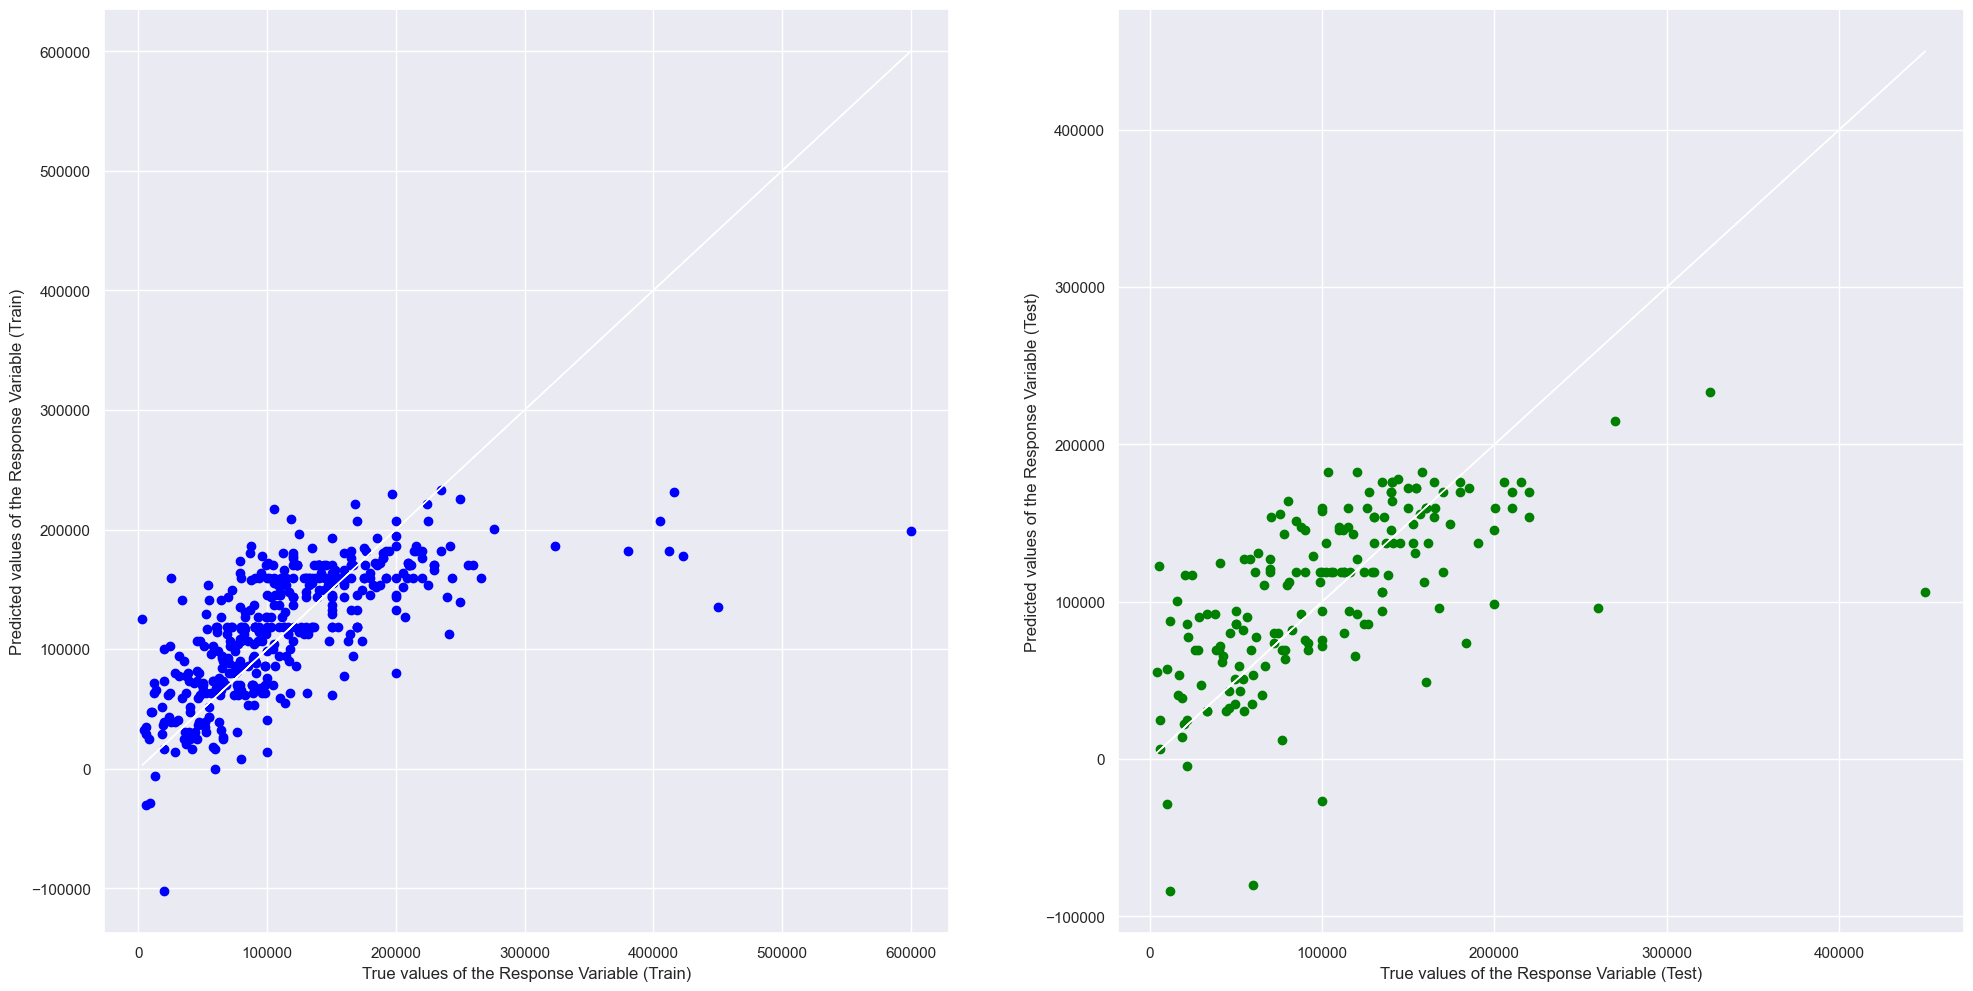

In [47]:

y_train_pred = model_lg.predict(X_train)
y_test_pred = model_lg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_lg.score(X_train, y_train))
print("Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_lg.score(X_test, y_test))
print("Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4582920172876539
Root Mean Squared Error (RMSE) 	: 53865.969637895316

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3415965673881016
Root Mean Squared Error (RMSE) 	: 52049.099593898056



### 2.1. Try to imporve the performance of the linear regression model by droping outlier

In [49]:
df2 = dsdata.loc[dsdata['salary_group'] != 'outlier', ["employment_type", "employee_continent", "company_continent", "domain", "job_type","remote_ratio","experience_level","company_size","salary_in_usd"]].copy()
df2.shape

(597, 9)

In [50]:
# One Hot Encoding
df_encoded2 = pd.get_dummies(df2, columns=["employment_type", "employee_continent", "company_continent", "domain", "job_type"])

# Integer Encoding
df_encoded2["remote_ratio"] = df_encoded2["remote_ratio"].replace({0:0, 1:1, 2:2})
df_encoded2["experience_level"] = df_encoded2["experience_level"].replace({"EN":0, "MI":1, "SE":2, "EX":3})
df_encoded2["company_size"] = df_encoded2["company_size"].replace({"S":0, "M":1, "L":2})

df_encoded2.head()

,remote_ratio,experience_level,company_size,salary_in_usd,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,employee_continent_AFRICA,employee_continent_ASIA,...,domain_Management,domain_NLP,domain_Unknown,job_type_Analyst,job_type_Consultant,job_type_Developer,job_type_Engineer,job_type_Head,job_type_Manager,job_type_Scientist
0,0,1,2,79833,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,0,260000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,1,109024,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,20000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,2,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


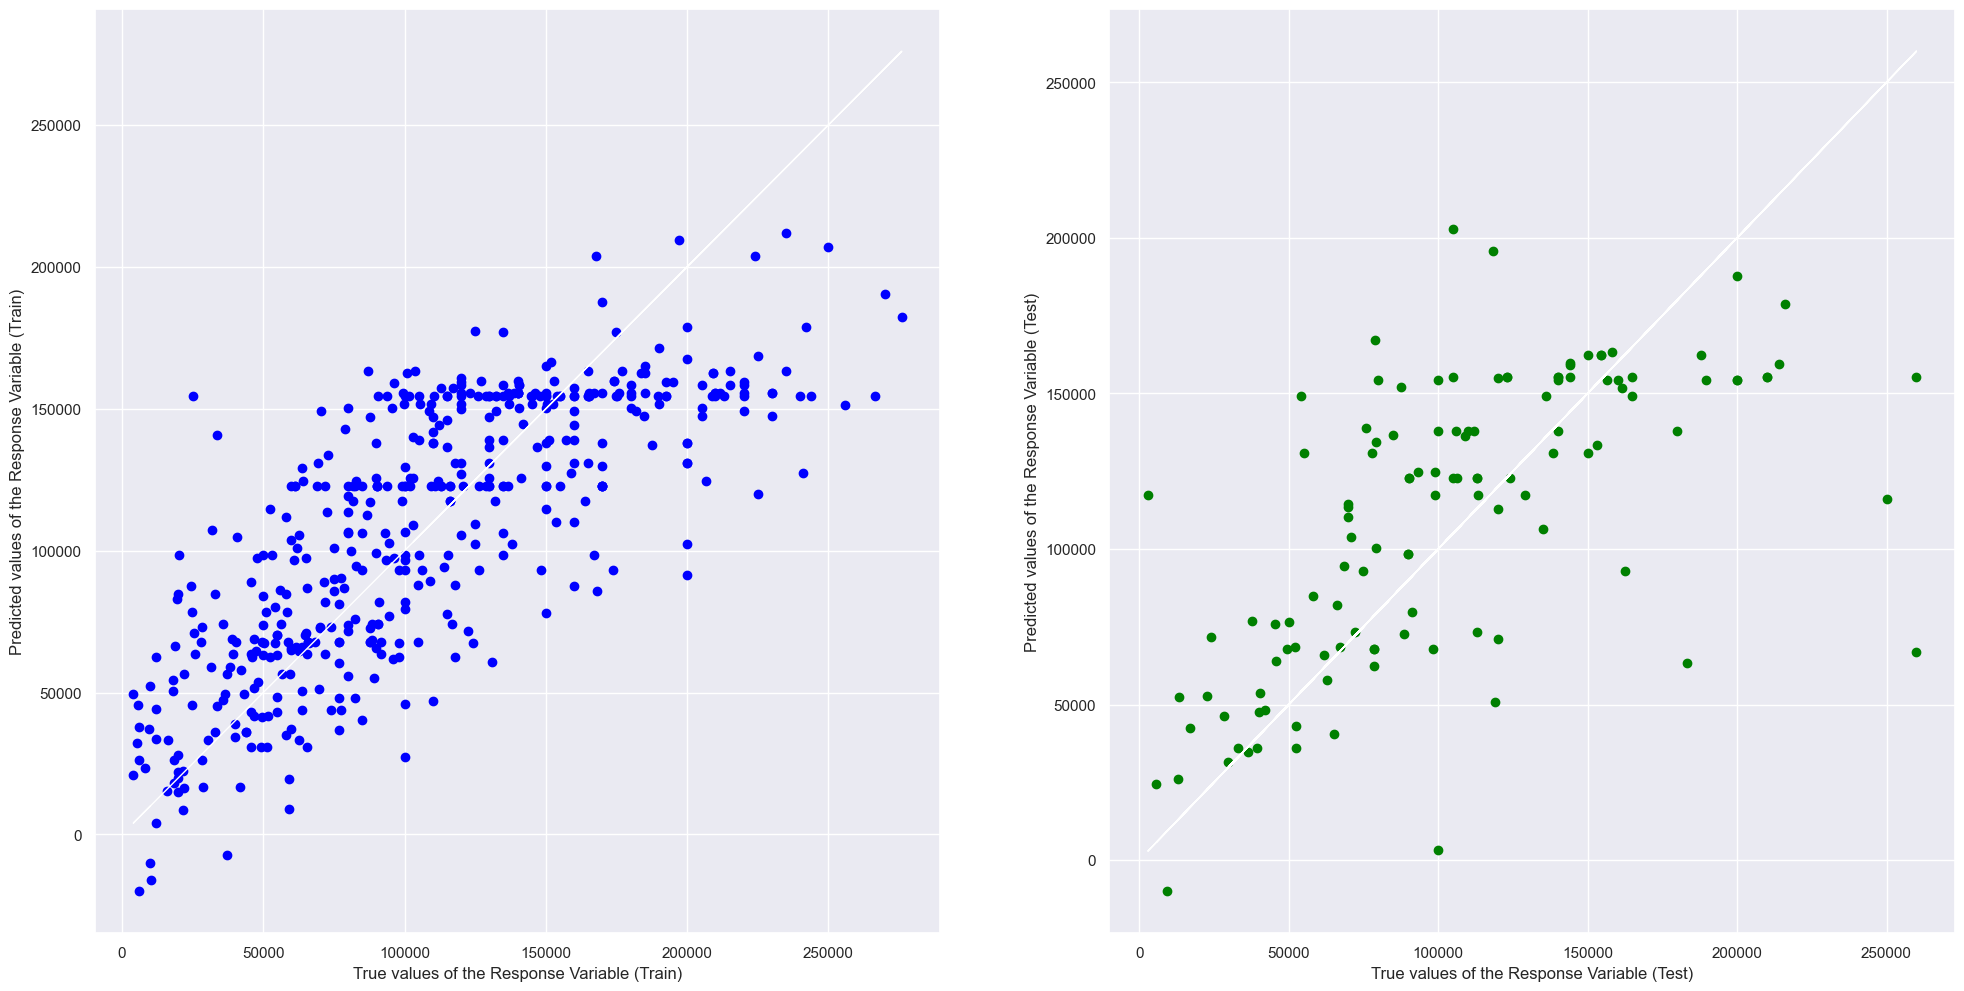

In [51]:
X2 = df_encoded2.drop("salary_in_usd", axis=1)
y2 = df_encoded2["salary_in_usd"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=48)
model_lg2 = LinearRegression()
model_lg2.fit(X_train2, y_train2)

y_train_pred2 = model_lg2.predict(X_train2)
y_test_pred2 = model_lg2.predict(X_test2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2, y_train_pred2, color = "blue")
axes[0].plot(y_train2, y_train2, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2, y_test_pred2, color = "green")
axes[1].plot(y_test2, y_test2, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [52]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_lg2.score(X_train2, y_train2))
print("Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_train2, y_train_pred2)))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_lg2.score(X_test2, y_test2))
print("Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_test2, y_test_pred2)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5958494907588698
Root Mean Squared Error (RMSE) 	: 37518.28383685604

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3689473665647558
Root Mean Squared Error (RMSE) 	: 44767.1763113519



#### comment: After droping outliers, the model's performance become better on train dataset, but there is no significant improvement on test dataset.

### 2.2 Check using K-Fold Cross Validation to see if it will improve accuracy

In [53]:
from sklearn.model_selection import cross_val_score

X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]

model_lg = LinearRegression()
scores = cross_val_score(model_lg, X, y, cv=5) # use 5 folds

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("original train:Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_train, y_train_pred)))
print("original test:Root Mean Squared Error (RMSE) \t:", sqrt(mean_squared_error(y_test, y_test_pred)))


Cross-validation scores: [ 3.25899195e-01  3.29452344e-01  3.35983730e-01 -1.54588014e+24
  8.69438970e-02]
Mean score: -3.0917602759067295e+23
original train:Root Mean Squared Error (RMSE) 	: 53865.969637895316
original test:Root Mean Squared Error (RMSE) 	: 52049.099593898056


### 2.3 Using Gridsearch to improve on the K-Fold Cross Validation model

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

model = Ridge()

# Fit the model to the data
model.fit(X_train, y_train)

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'alpha': 10}
Best score: 0.43286982523180323


#### comment: with 10 fold as the best parameter, the performance of the k-fold cross validation model is improved.

#### Summary: With improved model, we find its performance still wrose than the improved random forest model.

---

## 3.0. Building Support Vector Machine Regressor Model

### 3.1. Define Model Inputs (X) & Output (y)

In [ ]:
X = ds_num.drop(['salary_in_usd', 'work_year', 'salary'], axis=1)
y = ds_num['salary_in_usd']

In [ ]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
svr = SVR(C=0.5, kernel = "rbf")
svr.fit(X_train,y_train)

SVR(C=0.5)

In [ ]:
print('Training root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X_train), y_train)))
print('Testing root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X_test), y_test)))

Training root mean squared error is:  74172.53022629712
Testing root mean squared error is:  65310.37575302947


In [ ]:
print('Training accuracy is: ', svr.score(X_train,y_train))
print('Testing accuracy is: ', svr.score(X_test,y_test))

Training accuracy is:  -0.020235954102069575
Testing accuracy is:  -0.02086974171810474


### 3.2. Applying K-Fold Cross Validation

In [ ]:
results = cross_validate(svr, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-4.57181366e+09 -4.90331931e+09 -5.29615266e+09 -5.53060962e+09
 -5.26140090e+09]
test_score:  [-6.87004331e+09 -5.74459144e+09 -4.69334941e+09 -3.75001182e+09
 -5.01340513e+09]


In [ ]:
print('Cross validation training root mean_squared_error is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross validation testing root mean_squared_error is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))

Cross validation training root mean_squared_error is: 71502.86168507041
Cross validation testing root mean_squared_error is: 72209.97314749708


### 3.3. Perform Gridsearch to find the best hyperparameters for Support Vector Machine Regressor Model

In [ ]:
param_grid = { "C" : [0.8,1,0.5,0.4,0.2], 
              "kernel": ["rbf","sigmoid"]}
gs = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gs = gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

-5211692767.571948
{'C': 1, 'kernel': 'rbf'}


In [ ]:
svr_new = SVR(C=1, kernel = "rbf")
svr_new.fit(X_train,y_train)

SVR(C=1)

In [ ]:
print('Training root mean squared error is: ', sqrt(mean_squared_error(svr_new.predict(X_train), y_train)))
print('Testing root mean squared error is: ', sqrt(mean_squared_error(svr_new.predict(X_test), y_test)))

Training root mean squared error is:  74160.80697184717
Testing root mean squared error is:  65297.10887717974


In [ ]:
train_R2_new = svr_new.score(X_train,y_train)
print('training accuracy is: ', svr_new.score(X_train,y_train))
test_R2_new = svr_new.score(X_test,y_test)
print('testing accuracy is: ', svr_new.score(X_test,y_test))

training accuracy is:  -0.019913475134398118
testing accuracy is:  -0.02045503344685451


### 3.4. Applying K-Fold Cross Validation to newly improved model to compare results

In [ ]:
# Evaluate the Model using K-folds Cross validation
new_results = cross_validate(svr_new, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', new_results['train_score'])
print('test_score: ', new_results['test_score'])

train_score:  [-4.57005759e+09 -4.90175053e+09 -5.29415651e+09 -5.52839154e+09
 -5.25868687e+09]
test_score:  [-6.86701887e+09 -5.74182716e+09 -4.69191719e+09 -3.74783141e+09
 -5.00986921e+09]


In [ ]:
print('Cross validation training root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('Cross validation testing root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))

Cross validation training root mean_squared_error is: 71488.520812489
Cross validation testing root mean_squared_error is: 72192.05473992237


### 3.5. Summary

In [ ]:
print("**Current Model of Support Vector Machine Regressor**")
print("RMSE Values")
print("---Before---")
print('Training root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X_train), y_train)))
print('Testing root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X_test), y_test)))
print('Cross validation training root mean_squared_error is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross validation testing root mean_squared_error is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))
print()
print("---After---")
print('Training root mean squared error is: ', sqrt(mean_squared_error(svr_new.predict(X_train), y_train)))
print('Testing root mean squared error is: ', sqrt(mean_squared_error(svr_new.predict(X_test), y_test)))
print('Cross validation training root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('Cross validation testing root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))

# print the accuracy
print()
print("Accuracy")
print("---Before---")
print('Training accuracy is: ', svr.score(X_train,y_train))
print('Testing accuracy is: ', svr.score(X_test,y_test))
print("---After---")
print('Training accuracy is: ', svr_new.score(X_train,y_train))
print('Testing accuracy is: ', svr_new.score(X_test,y_test))

**Current Model of Support Vector Machine Regressor**
RMSE Values
---Before---
Training root mean squared error is:  74172.53022629712
Testing root mean squared error is:  65310.37575302947
Cross validation training root mean_squared_error is: 71502.86168507041
Cross validation testing root mean_squared_error is: 72209.97314749708

---After---
Training root mean squared error is:  74160.80697184717
Testing root mean squared error is:  65297.10887717974
Cross validation training root mean_squared_error is: 71488.520812489
Cross validation testing root mean_squared_error is: 72192.05473992237

Accuracy
---Before---
Training accuracy is:  -0.020235954102069575
Testing accuracy is:  -0.02086974171810474
---After---
Training accuracy is:  -0.019913475134398118
Testing accuracy is:  -0.02045503344685451


It can be clearly seen that Support Vector Machine isn't a very good model to be used for this dataset as its training accuracy and testing accuracy for before and after are below 0.0

This means that the model is not suitable to be used for this dataset. Hence it is recommended to use some other model to predict

---